<a href="https://colab.research.google.com/github/amrahmani/Marketing/blob/main/AIMarketing_Ch8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hands-On Activity 1: Brand Equity Analysis**

**Objective:** Assess brand equity using product descriptions. Identify high-equity products via sentiment analysis.

**Dataset:**

https://github.com/amrahmani/Marketing/blob/main/amazon_review_data.csv

**Feature Descriptions:**

reviewerID: A unique ID assigned to each customer who submitted a review.

asin: The unique identifier (ASIN) for each product ***(for this dataset we have only one product, B007WTAJTO)***

reviewerName: The name or alias of the reviewer.

helpful: A list indicating the number of helpful votes [helpful_yes, total_votes].

reviewText: The full text of the customer's review.

overall: The rating score given to the product (usually from 1 to 5).

summary: A brief headline summary of the customer’s review.

unixReviewTime: The review submission time in Unix timestamp format.

reviewTime: The human-readable date of the review submission.

day_diff: The number of days since the review was posted (relative to some reference date).

helpful_yes: Number of users who found the review helpful.

total_vote: Total number of votes received (helpful + not helpful).

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


First 5 rows of the dataset:
       reviewerID        asin  reviewerName helpful  \
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]   
1  A18K1ODH1I2MVB  B007WTAJTO          0mie  [0, 0]   
2  A2FII3I2MBMUIA  B007WTAJTO           1K3  [0, 0]   
3   A3H99DFEG68SR  B007WTAJTO           1m2  [0, 0]   
4  A375ZM4U047O79  B007WTAJTO  2&amp;1/2Men  [0, 0]   

                                          reviewText  overall  \
0                                         No issues.      4.0   
1  Purchased this for my device, it worked as adv...      5.0   
2  it works as expected. I should have sprung for...      4.0   
3  This think has worked out great.Had a diff. br...      5.0   
4  Bought it with Retail Packaging, arrived legit...      5.0   

                                  summary  unixReviewTime  reviewTime  \
0                              Four Stars      1406073600  2014-07-23   
1                           MOAR SPACE!!!      1382659200  2013-10-25   
2               nothing to rea

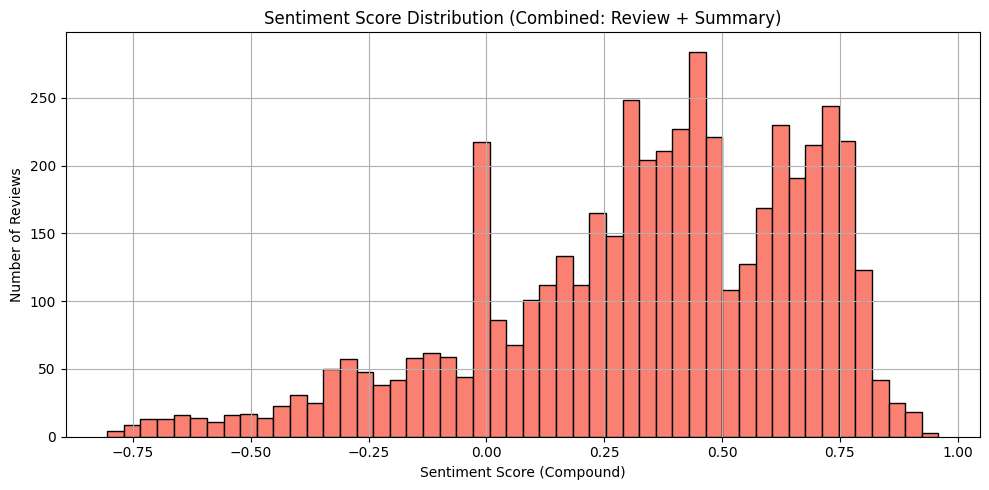

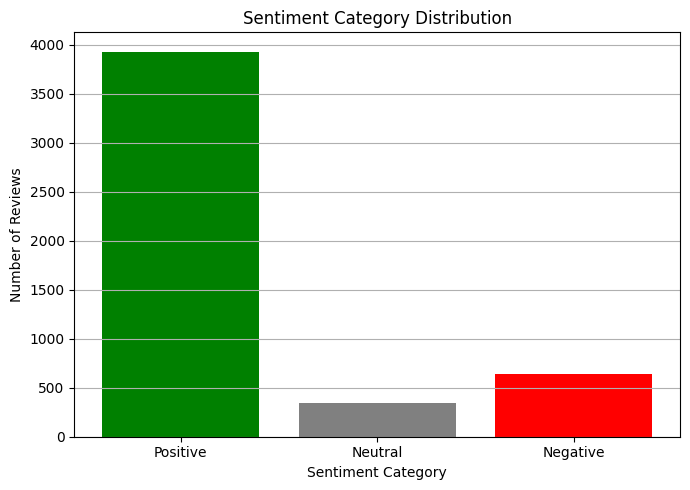

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Ensure VADER lexicon is downloaded
nltk.download('vader_lexicon')

# Step 1: Load dataset
url = "https://raw.githubusercontent.com/amrahmani/Marketing/main/amazon_review_data.csv"
df = pd.read_csv(url)

# Display first 5 rows to confirm data
print("First 5 rows of the dataset:")
print(df.head())

# Step 2: Drop rows with missing review text or summary
df = df.dropna(subset=['reviewText', 'summary'])

# Step 3: Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Step 4: Compute sentiment scores for reviewText and summary
# {'neg', 'neu', 'pos', 'compound'}, ['compound']: Extracts the overall sentiment score, ranging from -1 (very negative) to +1 (very positive).
df['review_sentiment'] = df['reviewText'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
df['summary_sentiment'] = df['summary'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Step 5: Compute combined sentiment (average of review + summary)
df['combined_sentiment'] = df[['review_sentiment', 'summary_sentiment']].mean(axis=1)

# Step 6: Aggregate average combined sentiment per product
product_sentiment = df.groupby('asin')['combined_sentiment'].mean().reset_index()
product_sentiment.columns = ['asin', 'avg_combined_sentiment']

# Step 7: Merge with product review counts
product_count = df['asin'].value_counts().reset_index()
product_count.columns = ['asin', 'review_count']
product_sentiment = pd.merge(product_sentiment, product_count, on='asin')

# Optional: Filter products with at least 10 reviews
product_sentiment = product_sentiment[product_sentiment['review_count'] >= 10]

# Step 8: Print Top 5 Products by Combined Sentiment
# for this dataset we have only one product, B007WTAJTO
top5 = product_sentiment.sort_values(by='avg_combined_sentiment', ascending=False).head(5)

print("\nTop 5 High-Equity Products by Combined Sentiment Score (Review + Summary):")
print(top5) # for this dataset we have only one product, B007WTAJTO

# Step 9: Histogram of raw sentiment scores (combined)
plt.figure(figsize=(10, 5))
plt.hist(df['combined_sentiment'], bins=50, color='salmon', edgecolor='black')
plt.title("Sentiment Score Distribution (Combined: Review + Summary)")
plt.xlabel("Sentiment Score (Compound)")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Categorize combined sentiment into Positive, Neutral, Negative
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['combined_sentiment'].apply(label_sentiment)

# Step 11: Plot labeled histogram
label_counts = df['sentiment_label'].value_counts().reindex(['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(7, 5))
plt.bar(label_counts.index, label_counts.values, color=['green', 'gray', 'red'])
plt.title("Sentiment Category Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Hands-On Activity 2: Customer Loyalty Analysis**

**Objective:**
Identify loyal customers using repeat purchase patterns and segment them using K-Means Clustering.
https://www.kaggle.com/datasets/vijayuv/onlineretail


In [6]:
from google.colab import files
files.upload() # This will open a file picker. Select your kaggle.json file.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amirmasoudrahmani","key":"83083c6673953a54498441b57baeb137"}'}

In [7]:
!pip install -q kaggle
!mkdir -p ~/.kaggle/
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -al

total 16
drwxr-xr-x 1 root root 4096 Jun 25 02:16 .
drwxr-xr-x 1 root root 4096 Jun 25 00:29 ..
drwxr-xr-x 4 root root 4096 Jun 23 13:37 .config
drwxr-xr-x 1 root root 4096 Jun 23 13:38 sample_data


In [8]:
!kaggle datasets download -d vijayuv/onlineretail -p ./data/
!unzip ./data/onlineretail.zip -d ./data/

Dataset URL: https://www.kaggle.com/datasets/vijayuv/onlineretail
License(s): CC0-1.0
  0% 0.00/7.20M [00:00<?, ?B/s]
100% 7.20M/7.20M [00:00<00:00, 163MB/s]
Archive:  ./data/onlineretail.zip
  inflating: ./data/OnlineRetail.csv  


Dataset loaded successfully.
Initial shape: (541909, 8)
Missing values per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Dropped missing CustomerID rows. New shape: (406829, 8)

Top 5 customers by number of purchases:
     CustomerID  NumPurchases
1895    14911.0           248
330     12748.0           224
4042    17841.0           169
1674    14606.0           128
2192    15311.0           118

Top 5 customers by quantity purchased:
     CustomerID  TotalQuantity
1703    14646.0         196719
55      12415.0          77242
1895    14911.0          77180
3758    17450.0          69029
4233    18102.0          64122

Merged data shape: (4372, 3)

Cluster Centers (NumPurchases vs. TotalQuantity):
[[4.59838337e+00 8.02819630e+02]
 [7.16000000e+01 7.73543000e+04]
 [4.88437500e+01 2.05355000e+04]]

Cluster Sizes:
LoyaltyCluster
0    4330
1 

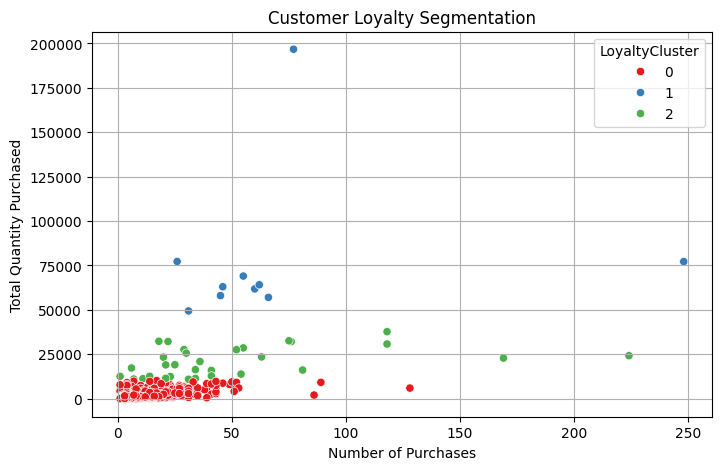

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('./data/OnlineRetail.csv', encoding='latin1')

print("Dataset loaded successfully.")
print(f"Initial shape: {df.shape}")
print("Missing values per column:\n", df.isnull().sum())

# Drop missing CustomerIDs
df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].astype(str)
print(f"Dropped missing CustomerID rows. New shape: {df.shape}")

# Aggregate number of purchases per CustomerID
purchase_counts = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
purchase_counts.columns = ['CustomerID', 'NumPurchases']
print("\nTop 5 customers by number of purchases:")
print(purchase_counts.sort_values(by='NumPurchases', ascending=False).head())

# Aggregate total quantity per CustomerID
quantity_sums = df.groupby('CustomerID')['Quantity'].sum().reset_index()
quantity_sums.columns = ['CustomerID', 'TotalQuantity']
print("\nTop 5 customers by quantity purchased:")
print(quantity_sums.sort_values(by='TotalQuantity', ascending=False).head())

# Merge for clustering
loyalty_df = pd.merge(purchase_counts, quantity_sums, on='CustomerID')
print(f"\nMerged data shape: {loyalty_df.shape}")

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
loyalty_df['LoyaltyCluster'] = kmeans.fit_predict(loyalty_df[['NumPurchases', 'TotalQuantity']])

# Cluster centers and sizes
print("\nCluster Centers (NumPurchases vs. TotalQuantity):")
print(kmeans.cluster_centers_)

print("\nCluster Sizes:")
cluster_counts = loyalty_df['LoyaltyCluster'].value_counts().sort_index()
print(cluster_counts)

# Interpret clusters based on sizes
print("\nCluster Interpretation:")
print(f"""
 Cluster 0 ({cluster_counts[0]} customers) – Majority Group
- Largest cluster, holding over 99% of the customers.
- These are likely low-loyalty customers with:
  • Few purchases
  • Low total quantity
- Represents one-time buyers, irregular customers, or those with minimal engagement.

 Cluster 2 ({cluster_counts[2]} customers) – Medium Loyalty Group
- Small fraction of customers, likely:
  • Moderate purchase frequency
  • Reasonable quantity purchased
- These customers might be repeat buyers but not highly frequent or high-volume.
- May be converted to loyal customers with targeted incentives.

 Cluster 1 ({cluster_counts[1]} customers) – High Loyalty Group
- Tiny but extremely valuable group.
- Likely made frequent and large purchases.
- Represent high-value loyal customers (VIPs).
- These customers should be retained and rewarded through loyalty programs, exclusive offers, or personalized communication.
""")

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=loyalty_df, x='NumPurchases', y='TotalQuantity', hue='LoyaltyCluster', palette='Set1')
plt.title('Customer Loyalty Segmentation')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Quantity Purchased')
plt.grid(True)
plt.show()

**Hands-On Activity 3: Price Sensitivity Analysis**

**Objective:**
Estimate price elasticity of demand using Linear Regression.


Filtered data to keep only positive Quantity and UnitPrice. New shape: (397884, 9)
Created a new column for 10% discount simulation.

Preview of price vs. avg. quantity sold:
   UnitPrice    Quantity
0      0.001    1.000000
1      0.040  130.303030
2      0.060  124.928571
3      0.070  468.571429
4      0.080   71.890909

Linear Regression Model Summary:
Elasticity Coefficient (Slope): -0.0343
R² Score: 0.0126

Analysis:

 Elasticity Coefficient (slope) shows how sensitive demand is to price.
    - Value: -0.0343
    - Interpretation: A negative slope means that quantity sold tends to decrease as price increases — this is expected in most real-world settings (law of demand).

 R² Score indicates how well UnitPrice explains variation in Quantity.
    - Value: 0.0126
    - Interpretation: The closer the R² score is to 1, the better the model explains the variation. Lower scores suggest other factors also influence quantity.

 The plotted demand curve gives a visual representation of h

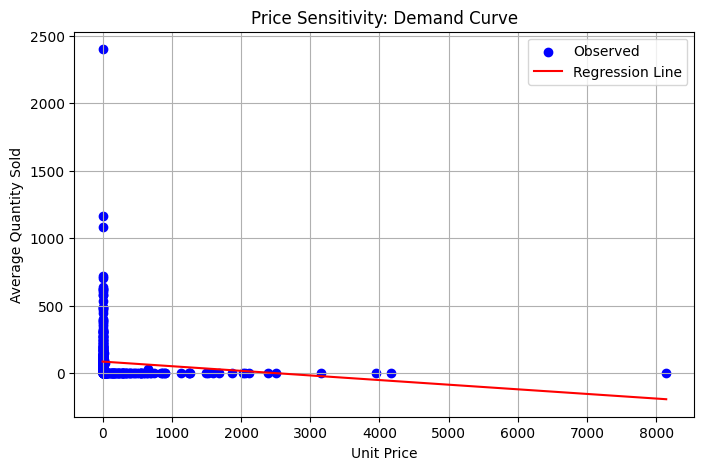

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Clean data: keep only positive Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print(f"\nFiltered data to keep only positive Quantity and UnitPrice. New shape: {df.shape}")

# Create a discounted price (simulate 10% off)
df['DiscountedPrice'] = df['UnitPrice'] * 0.9
print("Created a new column for 10% discount simulation.")

# Aggregate: Average Quantity sold at each UnitPrice
price_quantity_df = df.groupby('UnitPrice')['Quantity'].mean().reset_index()
print("\nPreview of price vs. avg. quantity sold:")
print(price_quantity_df.head())

# Fit linear regression model
X = price_quantity_df[['UnitPrice']]
y = price_quantity_df['Quantity']
model = LinearRegression()
model.fit(X, y)

# Predict and evaluate
y_pred = model.predict(X)
elasticity = model.coef_[0]
r2 = r2_score(y, y_pred)

print("\nLinear Regression Model Summary:")
print(f"Elasticity Coefficient (Slope): {elasticity:.4f}")
print(f"R² Score: {r2:.4f}")

# Interpretation
print("\nAnalysis:")
print(f"""
 Elasticity Coefficient (slope) shows how sensitive demand is to price.
    - Value: {elasticity:.4f}
    - Interpretation: A negative slope means that quantity sold tends to decrease as price increases — this is expected in most real-world settings (law of demand).

 R² Score indicates how well UnitPrice explains variation in Quantity.
    - Value: {r2:.4f}
    - Interpretation: The closer the R² score is to 1, the better the model explains the variation. Lower scores suggest other factors also influence quantity.

 The plotted demand curve gives a visual representation of how price changes affect average quantity sold.
""")

# Plot demand curve
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Observed')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Price Sensitivity: Demand Curve')
plt.xlabel('Unit Price')
plt.ylabel('Average Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()

**Activities**

**Task 1:** Compute VADER sentiment scores for reviewText only and list top 5 positive reviews.

**Task 2:** Group sentiment scores by reviewerID and identify the most positive reviewer.

**Task 3: Loyalty vs. Revenue**: Add TotalRevenue = Quantity × UnitPrice. Cluster customers using purchases and revenue.